In [ ]:
# load required libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
# load the diabetes dataset
filename = "data/pima-indians-diabetes.data.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
data = pd.read_csv(filename, names=names)
array = data.values
X = array[:, 0:8]
y = array[:, 8]

In [ ]:
# Prepare models
models = []
models.append(("LR", LogisticRegression(solver="liblinear")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [4]:
# Evaluate each model in turn
results = []
names = []
scoring = "accuracy"
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

LR: 0.7709 (0.0509)
LDA: 0.7670 (0.0480)
KNN: 0.7110 (0.0508)
CART: 0.6915 (0.0402)
NB: 0.7591 (0.0390)
SVM: 0.7605 (0.0347)


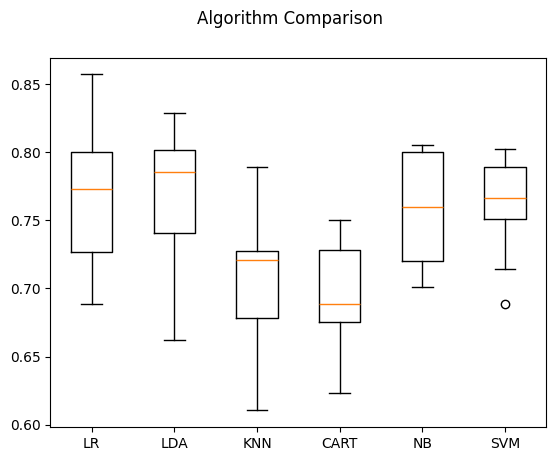

In [5]:
# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

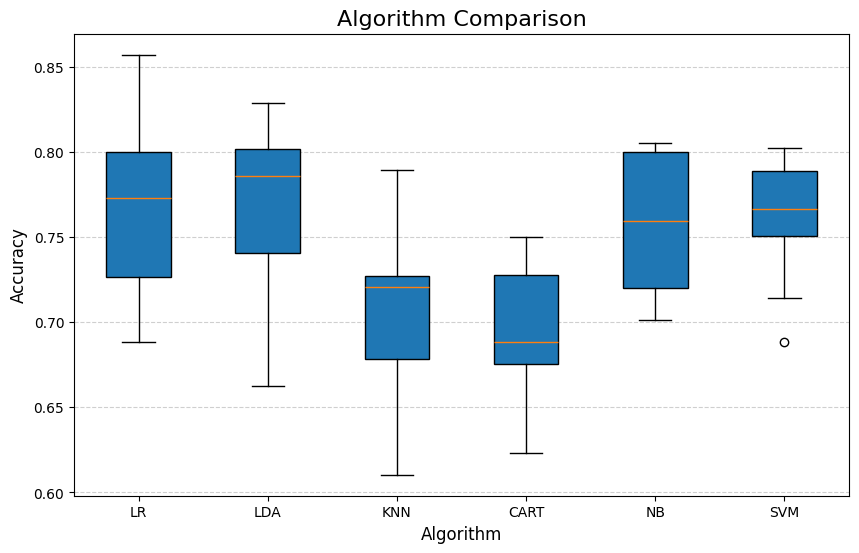

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(results, patch_artist=True)
plt.title("Algorithm Comparison", fontsize=16)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(ticks=range(1, len(names) + 1), labels=names)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

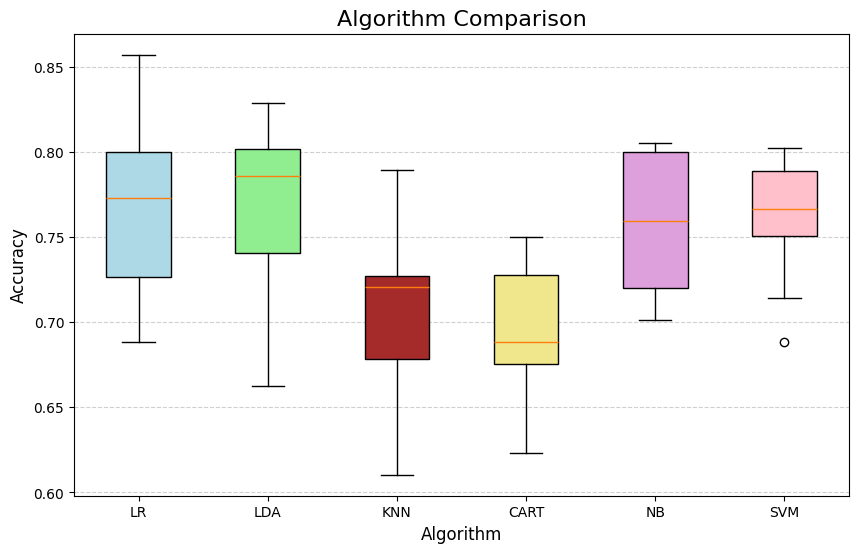

In [ ]:
colors = ["lightblue", "lightgreen", "brown", "khaki", "plum", "pink"]

plt.figure(figsize=(10, 6))
bp = plt.boxplot(results, patch_artist=True)

for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Algorithm Comparison", fontsize=16)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(ticks=range(1, len(names) + 1), labels=names)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

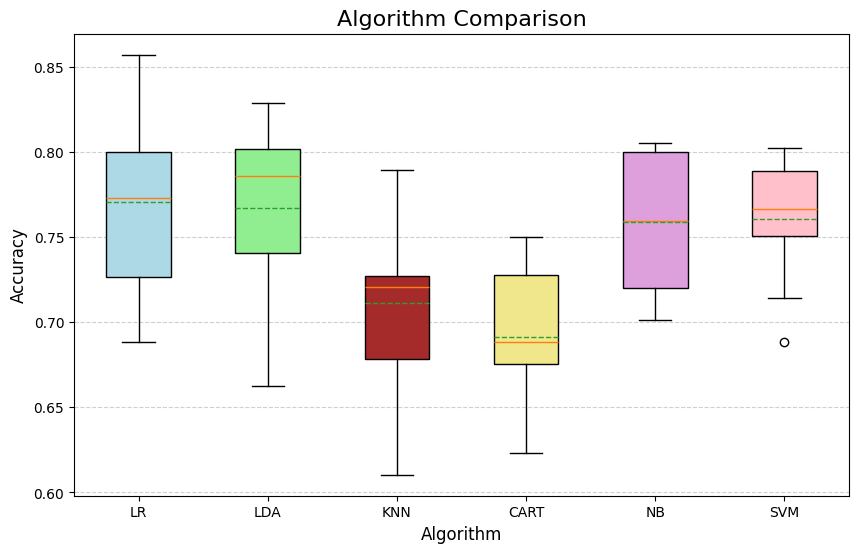

In [ ]:
colors = ["lightblue", "lightgreen", "brown", "khaki", "plum", "pink"]

plt.figure(figsize=(10, 6))
bp = plt.boxplot(results, patch_artist=True, showmeans=True, meanline=True)

for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Algorithm Comparison", fontsize=16)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(ticks=range(1, len(names) + 1), labels=names)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

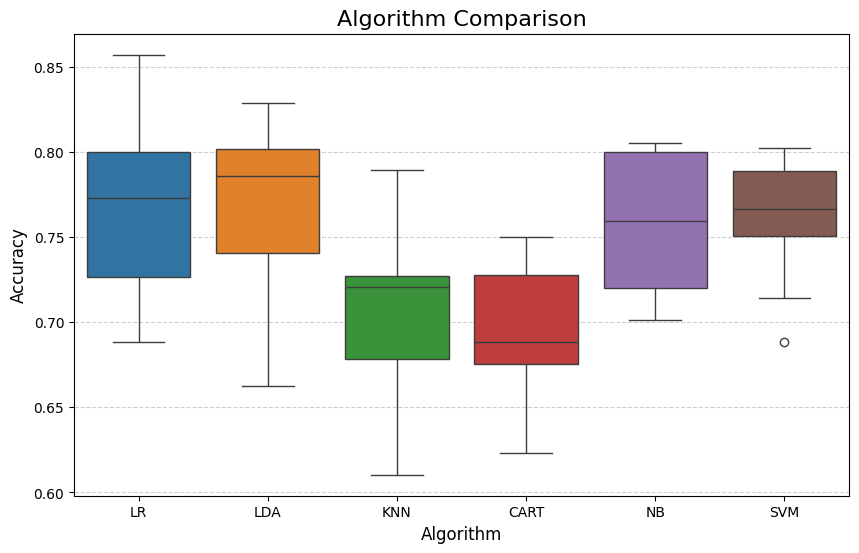

In [ ]:
plt.figure(figsize=(10, 6))
bp = sns.boxplot(data=results)

plt.title("Algorithm Comparison", fontsize=16)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(ticks=range(len(names)), labels=names)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()